In [125]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import sklearn
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score

In [5]:
os.chdir('C:\\Users\\shoun\\Coding\\Datasets')

In [9]:
df10 = pd.read_csv('creditcard.csv')

In [10]:
df10.shape

(284807, 31)

In [11]:
df10.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class      object
dtype: object

In [12]:
df10.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [14]:
df10.drop('Time', inplace=True, axis = 1)

In [15]:
df10.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [18]:
df10.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [26]:
clm = list(df10.columns)

In [28]:
clm.remove('Class')

In [29]:
clm

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [30]:
for i in clm:
    df10[i] = df10[i].fillna(df10[i].median())

In [35]:
df10.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [60]:
df110['V1'].values[i]

-1.3598071336738

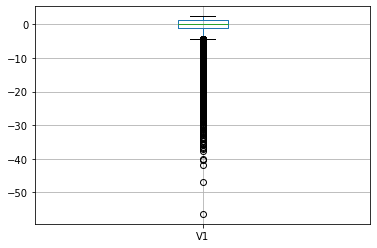

In [50]:
df10[['V1']].boxplot()

In [42]:
df110 = df10

In [72]:
def rem_out(arg):
    Q1 = df110[[arg]].quantile(0.25)
    Q3 = df110[[arg]].quantile(0.75)
    IQR = Q3 - Q1
    Max = Q3 + (IQR*1.5)
    Min = Q1 - (IQR*1.5)

    for i in range(0,len(df110)):
        if float(df110[arg].values[i]) < float(Min):
            df110[arg].values[i] = Min
        elif float(df110[arg].values[i]) > float(Max):
            df110[arg].values[i] = Max
        else:
            continue

In [73]:
df110.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [74]:
for j in clm:
    rem_out(j)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Text major ticklabel objects>)

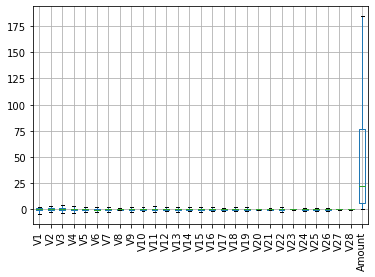

In [80]:
df110.boxplot()
plt.xticks(rotation = 90)

In [82]:
df110['Class'] = df110['Class'].astype('category')

In [84]:
df110['Class'] = df110['Class'].cat.codes

In [88]:
x1 = df110.drop('Class', axis = 1)

In [90]:
y = df110['Class']

In [94]:
x = StandardScaler().fit_transform(x1)

In [105]:
pca = PCA().fit(pd.DataFrame(x, columns=x1.columns))

In [100]:
pca.explained_variance_

array([2.02830564, 1.919629  , 1.84947062, 1.48416475, 1.40791908,
       1.31661518, 1.29182838, 1.25704088, 1.20055545, 1.16814997,
       1.14738629, 1.13145186, 1.05850391, 1.02244518, 1.01774667,
       1.00485584, 0.98555067, 0.97921568, 0.97121307, 0.92907288,
       0.70469912, 0.56892557, 0.5248436 , 0.49840702, 0.46859   ,
       0.39304207, 0.3583043 , 0.17503755, 0.13713159])

In [101]:
pca.explained_variance_ratio_

array([0.06994133, 0.06619387, 0.06377463, 0.05117792, 0.04854876,
       0.04540036, 0.04454565, 0.04334608, 0.04139832, 0.04028089,
       0.03956491, 0.03901544, 0.03650001, 0.03525661, 0.03509459,
       0.03465008, 0.03398439, 0.03376594, 0.03348999, 0.03203688,
       0.02429988, 0.01961805, 0.01809799, 0.01718639, 0.01615822,
       0.01355313, 0.01235528, 0.00603576, 0.00472866])

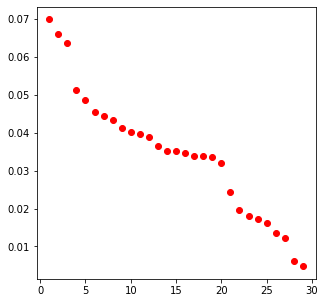

In [103]:
plt.figure(figsize=(5,5))
plt.scatter(x = list(range(1,1+len(pca.explained_variance_ratio_))), y = pca.explained_variance_ratio_, color = 'r')

In [104]:
len(pca.explained_variance_ratio_)

29

In [106]:
pca1 = PCA(n_components=27).fit_transform(pd.DataFrame(x, columns=x1.columns))

In [107]:
pca1

array([[ 0.65355764, -1.76415804, -0.43073683, ...,  0.0924722 ,
         0.02690157, -0.03519977],
       [-0.60956005,  1.06996249, -0.33137948, ..., -0.01716815,
        -0.13453328,  0.11341181],
       [ 2.29576501, -1.47082588, -1.01578337, ..., -1.84021237,
        -0.38677625, -0.94140577],
       ...,
       [ 0.42655689, -0.46500342, -0.34244854, ..., -0.00798825,
        -0.07534239,  0.00378673],
       [-0.0081819 , -1.64658829, -1.61062347, ..., -0.16386211,
         0.09789542,  0.04060256],
       [ 0.23891017, -1.62074629,  1.11668287, ..., -1.2165358 ,
        -0.17706489, -0.54805639]])

In [108]:
xtrain, xtest, ytrain, ytest = train_test_split(pca1, y, test_size = 0.2)

In [109]:
KNN = KNeighborsClassifier(n_neighbors=5).fit(xtrain, ytrain)

In [110]:
ykpred = KNN.predict(xtest)

In [113]:
print(classification_report(ytest, ykpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.49      0.65        99

    accuracy                           1.00     56962
   macro avg       0.97      0.75      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [114]:
accuracy_score(ytest, ykpred)

0.9990695551420246

In [116]:
confusion_matrix(ytest, ykpred)

array([[56860,     3],
       [   50,    49]], dtype=int64)

In [117]:
kmeans_model = KMeans().fit(pca1)

In [118]:
labels = kmeans_model.labels_

In [127]:
silhouette_score(pca1,labels)

0.07858346765746538

In [130]:
xa = []
ya = []
for i in range(1,12):
    kmod = KMeans(n_clusters=i).fit(pca1)
    xa.append(i)
    ya.append(float(kmod.inertia_))

([<matplotlib.axis.XTick at 0x16748e31100>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11')])

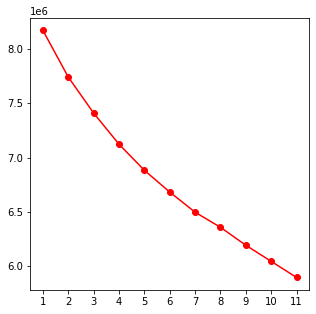

In [133]:
plt.figure(figsize=(5,5))
plt.scatter(xa, ya, color = 'r')
plt.plot(xa, ya, color = 'r')
plt.xticks(xa, xa)

In [138]:
kmeans_model2 = KMeans(n_clusters=2).fit(pca1)
lab2 = kmeans_model2.labels_
silhouette_score(pca1, lab2)

0.060822477068203415

In [136]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(xtrain, ytrain)
ylrpred = logreg.predict(xtest)
accuracy_score(ytest, ylrpred)

0.9984726659878516

In [137]:
confusion_matrix(ytest, ylrpred)

array([[56856,     7],
       [   80,    19]], dtype=int64)